# Text2Scene, WS 2020/21
## Fingerübung 01
### Tim Hau, 6805665

shell:

```
pip install -r requirements.txt
python -m spacy download en_core_web_sm
```

In [283]:
import spacy
#import en_core_web_sm
import os
import matplotlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import networkx as nx

#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm")

### Aufgabe 2.2

**tokenize_add_PoS** nimmt als Argument den Pfad zum 

In [284]:
def all_filenames(path):
    """ recursivly read all filenames into list """
    if not os.path.exists(path):
        print("path does not exist")
        return False
    
    dirs = []
    files = []
    for entry in os.listdir(path):
        subdir_path = os.path.join(path, entry)
        is_hidden = entry.startswith('.')
        is_xml = entry.endswith('.xml')     
        if os.path.isdir(subdir_path):
            dirs.append(subdir_path) 
        if os.path.isfile(subdir_path) and not is_hidden and is_xml:
            files.append(subdir_path)
            
    if len(dirs) > 0:
        for subdir_path in dirs:
            sub_files = all_filenames(subdir_path)
            files += sub_files
    
    return files


def read_all_xml_files(path):
    files = []
    for filename in all_filenames(path):
        content = read_file(filename)
        files.append((filename, content))
    return files

    
def read_file(path):
    with open(path, 'r') as f:
        try:
            return f.read()
        except UnicodeDecodeError:
            print(path)
            
            
def save_files(files, save_path):
    for (dir_path, content) in files:
        with open(save_path, 'w') as f:
            f.write(content)
    
                
def tokenize_add_PoS(path):
    files = read_all_xml_files(path)
    res = []
    for (filename, content) in files:
        soup = BeautifulSoup(content, 'xml')
        doc = nlp(soup.get_text().replace("\n", ""))
        current = []
        for token in doc:
            current.append((token.text, token.pos_))
        res.append(current)
            
    return res

In [254]:
tokenize_add_PoS('./Training/')

[[('        ', 'SPACE'),
  ('Asakusa', 'PROPN'),
  ('       ', 'SPACE'),
  ('Asakusa', 'PROPN'),
  ('is', 'AUX'),
  ('the', 'DET'),
  ('heart', 'NOUN'),
  ('of', 'ADP'),
  ('Shitamachi', 'PROPN'),
  (',', 'PUNCT'),
  ('the', 'DET'),
  ('quarter', 'NOUN'),
  ('       ', 'SPACE'),
  ('best', 'ADV'),
  ('-', 'PUNCT'),
  ('beloved', 'ADJ'),
  ('of', 'ADP'),
  ('that', 'DET'),
  ('fractious', 'ADJ'),
  (',', 'PUNCT'),
  ('gossipy', 'ADJ'),
  (',', 'PUNCT'),
  ('prodigal', 'ADJ'),
  ('population', 'NOUN'),
  ('called', 'VERB'),
  ('the', 'DET'),
  ('       ', 'SPACE'),
  ('Edokko', 'PROPN'),
  (',', 'PUNCT'),
  ('who', 'PRON'),
  ('trace', 'VERB'),
  ('their', 'DET'),
  ('“', 'PUNCT'),
  ('downtown', 'NOUN'),
  ('”', 'PUNCT'),
  ('roots', 'NOUN'),
  ('back', 'ADV'),
  ('at', 'ADV'),
  ('least', 'ADV'),
  ('three', 'NUM'),
  ('       ', 'SPACE'),
  ('generations', 'NOUN'),
  ('.', 'PUNCT'),
  ('Edokko', 'NOUN'),
  ('are', 'AUX'),
  ('suckers', 'NOUN'),
  ('for', 'ADP'),
  ('sentimentality', '

In [256]:
files = read_all_xml_files('./Training/')

### Aufgabe 2.3

In [294]:
def count_PoS_tags(files):
    res = {}
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        doc = nlp(soup.get_text().replace("\n", " "))
        
        for token in doc:
            pos = token.pos_
            if pos in res:
                res[pos] += 1
            else:
                res[pos] = 1
                
    return res

def plot_pos_count(pos_count):
    fig, ax = plt.subplots(1, 1, figsize=(10, 9))
    
    names = pos_count.keys()
    y_pos = range(len(names))
    number = pos_count.values()

    ax.barh(y_pos, number, align='center', height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(names)
    ax.invert_yaxis()
    ax.set_xlabel('number of occurrence')
    ax.set_title('PoS tags')

    plt.show()

In [293]:
pos_count = count_PoS_tags(files)
pos_count

{'SPACE': 805,
 'PROPN': 2116,
 'AUX': 1035,
 'DET': 3206,
 'NOUN': 5027,
 'ADP': 3009,
 'PUNCT': 3497,
 'ADV': 1326,
 'ADJ': 1800,
 'VERB': 2718,
 'PRON': 1362,
 'NUM': 686,
 'CCONJ': 825,
 'SCONJ': 426,
 'PART': 490,
 'X': 31,
 'INTJ': 10,
 'SYM': 27}

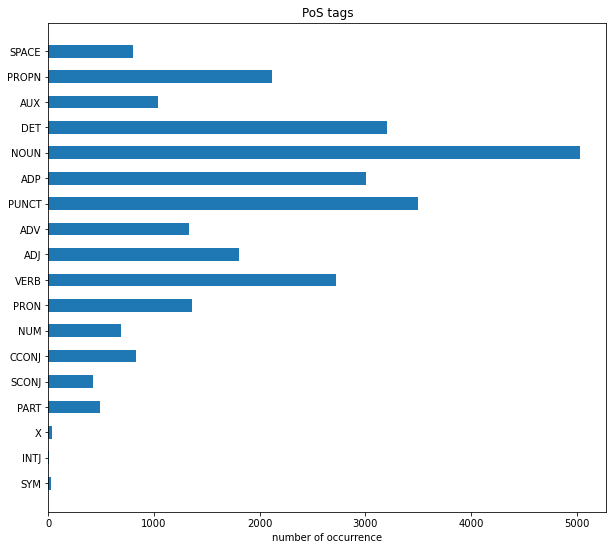

In [295]:
plot_pos_count(pos_count)

In [290]:
def count_entities(files):
    res = {
        'PLACE': 0,
        'SPATIAL_ENTITY': 0,
        'MOTION': 0,
        'MOTION_SIGNAL': 0,
        'SPATIAL_SIGNAL': 0,
        'QSLINK': 0,
        'OLINK': 0,
    }
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        for key in res.keys():
            res[key] += len(soup.find_all(key))
    return res

def plot_entities_count(entities_count):
    fig, ax = plt.subplots(1, 1, figsize=(10, 9))
    
    names = entities_count.keys()
    y_pos = range(len(names))
    number = entities_count.values()

    ax.barh(y_pos, number, align='center', height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(names)
    ax.invert_yaxis()
    ax.set_xlabel('number of occurrence')
    ax.set_title('SpatialEntities, Places, Motions, Signals, QsLinks, OLinks')

    plt.show()

In [291]:
entities_count = count_entities(files)
entities_count

{'PLACE': 1852,
 'SPATIAL_ENTITY': 1417,
 'MOTION': 771,
 'MOTION_SIGNAL': 526,
 'SPATIAL_SIGNAL': 714,
 'QSLINK': 970,
 'OLINK': 244}

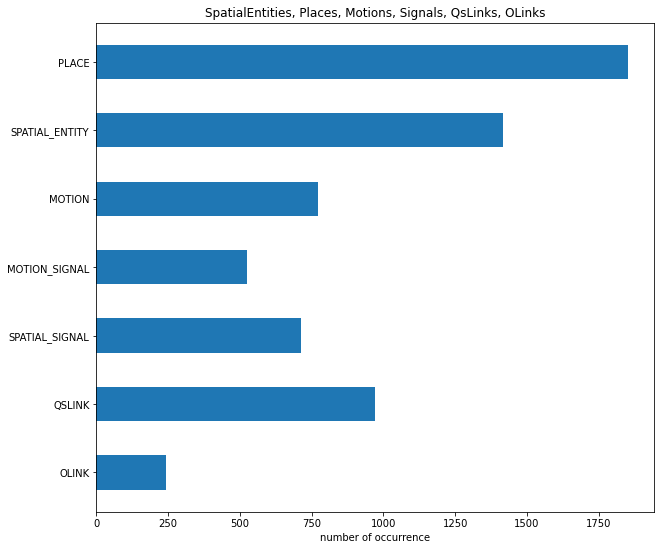

In [292]:
plot_entities_count(entities_count)

In [281]:
def count_QsLinks(files):
    res = {}
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        for qs_link in soup.find_all('QSLINK'):
            attrs = qs_link.attrs
            relType = attrs['relType']
            if relType in res:
                res[relType] += 1
            else: 
                res[relType] = 0
    return res


def plot_qslink_count(qslink_count):
    fig, ax = plt.subplots(1, 1, figsize=(10, 9))
    
    names = qslink_count.keys()
    y_pos = range(len(names))
    number = qslink_count.values()

    ax.barh(y_pos, number, align='center', height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(names)
    ax.invert_yaxis()
    ax.set_xlabel('number of occurrence')
    ax.set_title('QSLINK')

    plt.show()

In [282]:
qslink_count = count_QsLinks(files)
qslink_count

{'NTPP': 41,
 'IN': 585,
 'EC': 195,
 'TPP': 52,
 'EQ': 34,
 'PO': 11,
 'OUT': 2,
 'DC': 40,
 '': 1}

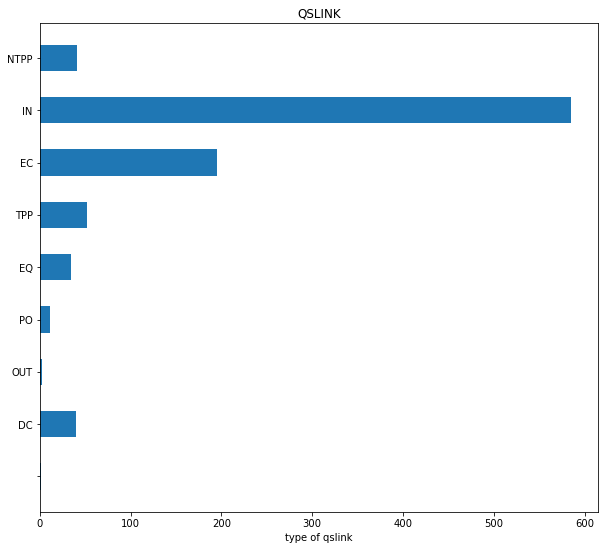

In [279]:
plot_qslink_count(qslink_count)

In [263]:
def count_length(files):
    res = {}
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        without_tags = soup.get_text()
        for sentence in without_tags.split('.'):
            length = len(sentence)
            if length == 0: 
                continue
            if length in res:
                res[length] += 1
            else:
                res[length] = 1
    return res


def plot_length_and_num(length_and_num):
    x = length_and_num.keys()
    y = length_and_num.values()
    fig, ax = plt.subplots(1,1, figsize=(12, 5))
    plt.bar(x, y)
    ax.set(xlabel="Satzlänge", ylabel="Häufigkeit")

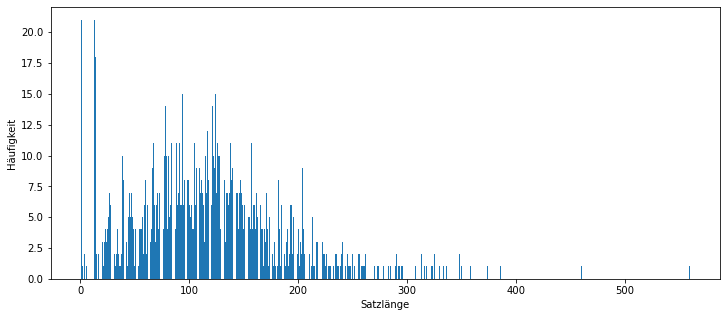

In [264]:
length_and_num = count_length(files)
plot_length_and_num(length_and_num)

In [274]:
def get_triggers(files):
    """
    qs_links = 
        { name of SPATIAL_SIGNAL : number of triggers }
    o_links  =
        { name of SPATIAL_SIGNAL : number of triggers }
    """
    res = {
        'qs_links': {},
        'o_links': {}
    }
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        
        qs_links = res['qs_links']
        for link in soup.find_all('QSLINK'):
            attrs = link.attrs
            trigger = attrs['trigger']
            trigger_elem = soup.find(id=trigger)
            if not trigger_elem:
                continue
            trigger_attrs = trigger_elem.attrs
            if 'text' in trigger_attrs:
                if trigger_attrs['text'] in qs_links:
                    qs_links[trigger_attrs['text']] += 1
                else:
                    qs_links[trigger_attrs['text']] = 1
                    
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        
        o_links = res['o_links']
        for link in soup.find_all('OLINK'):
            attrs = link.attrs
            trigger = attrs['trigger']
            trigger_elem = soup.find(id=trigger)
            if not trigger_elem:
                continue
            trigger_attrs = trigger_elem.attrs
            if 'text' in trigger_attrs:
                if trigger_attrs['text'] in o_links:
                    o_links[trigger_attrs['text']] += 1
                else:
                    o_links[trigger_attrs['text']] = 1
                
    return res  

def plot_triggers(trigger_stats):
    fig, ax = plt.subplots(1, 2, figsize=(15, 14))
    
    qs_links = trigger_stats['qs_links']
    o_links = trigger_stats['o_links']
    
    trigger_names = [qs_links.keys(), o_links.keys()]
    y_pos = [range(len(trigger_names[0])), range(len(trigger_names[1]))]
    number_triggers = [qs_links.values(), o_links.values()]

    ax[0].barh(y_pos[0], number_triggers[0], align='center', height=0.5)
    ax[0].set_yticks(y_pos[0])
    ax[0].set_yticklabels(trigger_names[0])
    ax[0].invert_yaxis()
    ax[0].set_xlabel('number of triggers')
    ax[0].set_title('QSLINK')
    

    ax[1].barh(y_pos[1], number_triggers[1], align='center', height=0.5)
    ax[1].set_yticks(y_pos[1])
    ax[1].set_yticklabels(trigger_names[1])
    ax[1].invert_yaxis()
    ax[1].set_xlabel('number of triggers')
    ax[1].set_title('OLINK')

    plt.show()

In [275]:
trigger_stats = get_triggers(files)
trigger_stats

{'qs_links': {'houses': 11,
  'in': 228,
  'filled': 3,
  'on': 75,
  'where': 68,
  'with': 15,
  'contain': 4,
  'house': 1,
  'inside': 4,
  'adjacent to': 1,
  'packed with': 1,
  'At': 6,
  'surmounted': 1,
  'around': 4,
  'connects': 4,
  'On': 4,
  'bordering': 1,
  'In': 22,
  'part         of': 1,
  'atop': 2,
  'against': 1,
  'full of': 10,
  'at': 54,
  'surrounding': 3,
  'of': 44,
  'stocked': 1,
  'has': 2,
  'through': 4,
  'along': 14,
  'overlooking': 2,
  'from': 3,
  'directly beneath': 1,
  'over': 2,
  'outside': 2,
  'across': 2,
  'next to': 10,
  'including': 3,
  'covered': 5,
  'on top': 2,
  'upon': 1,
  'under': 2,
  'surrounded': 2,
  'between': 5,
  'Down': 1,
  'up to': 1,
  'for': 1,
  'apart': 1,
  'contains': 1,
  'line': 1,
  'packed': 1,
  'afar': 1,
  'out of': 1,
  'Everywhere': 1,
  'covering': 1,
  'restricted': 1,
  'away': 2,
  'after': 1,
  'on top of': 1,
  'inside of': 1,
  'in front of': 1,
  'beside': 1,
  'far from': 3,
  'to': 2,
  'up

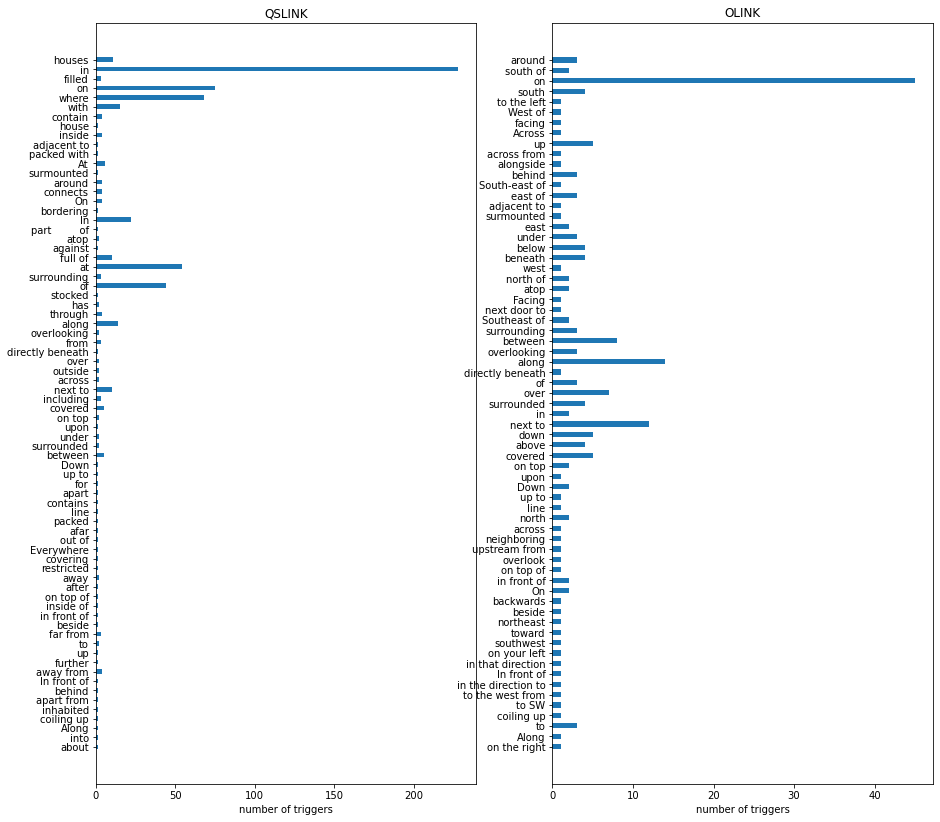

In [267]:
plot_triggers(trigger_stats)

In [383]:
def top_five_movement(files):
    count = {}
    for (filename, file) in files:
        soup = BeautifulSoup(file, 'xml')
        motion = soup.find_all('MOTION')
        for elem in motion:
            text = elem.attrs['text']
            if text in count:
                count[text] += 1
            else:
                count[text] = 1
                
    as_tuples = count.items()
    sorted_count = sorted(as_tuples, key=lambda tup: tup[1])
    return sorted_count[-5:]
        
def plot_top_five(top_five):
    fig, ax = plt.subplots(1,1, figsize=(12, 5))
    x = [t[0] for t in top_f]
    plt.bar(x, y)
    ax.set(xlabel="Satzlänge", ylabel="Häufigkeit")

In [384]:
top_five = top_five_movement(files)
top_five

[('go', 15), ('bike', 15), ('biking', 16), ('visited', 21), ('biked', 22)]

NameError: name 'x' is not defined

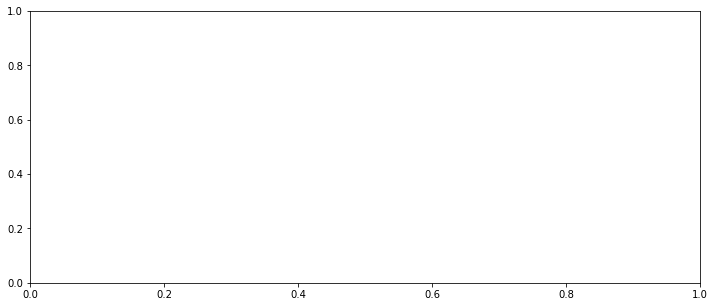

In [385]:
plot_top_five(top_five)

### Aufgabe 2.4

In [268]:
bicycle = read_file('./Training/RFC/Bicycles.xml')
highlights_of_the_prado_museum = read_file('./Training/ANC/WhereToMadrid/Highlights_of_the_Prado_Museum.xml')

In [343]:
def graph_from_file(soup):    
    places = soup.find_all('PLACE')
    spatial_entities = soup.find_all('SPATIAL_ENTITY')
    spatials = places + spatial_entities
    
    meta_links = soup.find_all('METALINK')
    
    o_links = soup.find_all('OLINK')
    qs_links = soup.find_all('QSLINK')
    links = o_links + qs_links

    
    graph = {
        "nodes": [],
        "colors": [],
        "edges": [],
        "labels": {},
        "edge_colors": [],
    }
    
    for m_link in meta_links:
        id_from = m_link.attrs['fromID']
        id_to = m_link.attrs['toID']
        
        spatial_to = soup.select('#' + id_to)[0]
        if spatial_to in spatials:
            spatials.remove(spatial_to)
        
    for spatial in spatials:
        attrs = spatial.attrs
        node = (attrs['text'], { "id": attrs['id'] })
        graph['nodes'].append(node)
            
    for link in links:
        attrs = link.attrs
        from_id = attrs['fromID']
        to_id = attrs['toID']
        
        from_elem = None
        to_elem = None
        
        for node in graph['nodes']:
            if from_id == node[1]['id']:
                from_elem = node[0]
            if to_id == node[1]['id']:
                to_elem = node[0]
        
        edge = (from_elem, to_elem)
        graph['labels'][edge] = attrs['relType']
        graph['edges'].append(edge)
        edge_color = 'green' if link.name == 'QSLINK' else 'magenta'
        graph['edge_colors'].append(edge_color)
        
    return graph


def get_node_color(soup, text):
    elem = soup.find_all(attrs={"text": text})[0]
    if elem.name == 'PLACE':
        return 'red'
    else:
        return 'blue'


def plot_file_as_graph(file):
    soup = BeautifulSoup(file, 'xml')
    graph = graph_from_file(soup)
    
    G = nx.Graph()
    G.add_nodes_from(graph['nodes'])
    G.add_edges_from(graph['edges'])
    pos = nx.spring_layout(G, iterations=10)
   
    plt.figure(1,figsize=(10,10))
    
    color_map = []
    for node in G:
        color = get_node_color(soup, node)
        color_map.append(color)
        
    nx.draw(
        G, pos,
        node_color=color_map,
        edge_color=graph['edge_colors'],
        cmap=plt.cm.Blues,
        node_size=40,
    )
    
    pos_higher = {}
    for k,v in pos.items():
        pos_higher[k] = (v[0], v[1]+0.03)
    
    nx.draw_networkx_edge_labels(
        G,pos,
        edge_labels=graph['labels'],
        font_size=10,
    )
    
    nx.draw_networkx_labels(G, pos_higher, font_size=14)

red is for PLACE and blue is for SPATIAL_ENTITY, green for QSLINK and magenta for OLINK

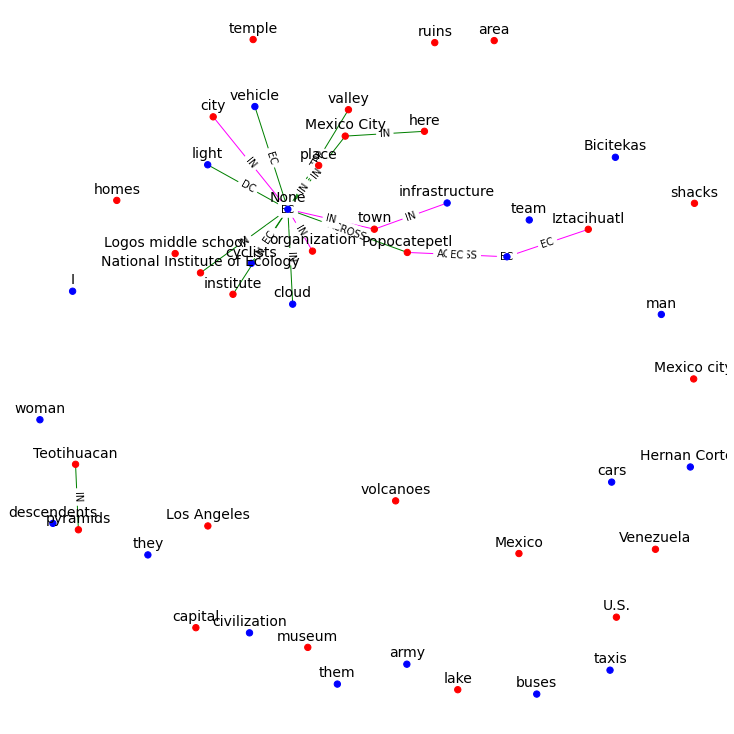

In [344]:
plot_file_as_graph(bicycle)

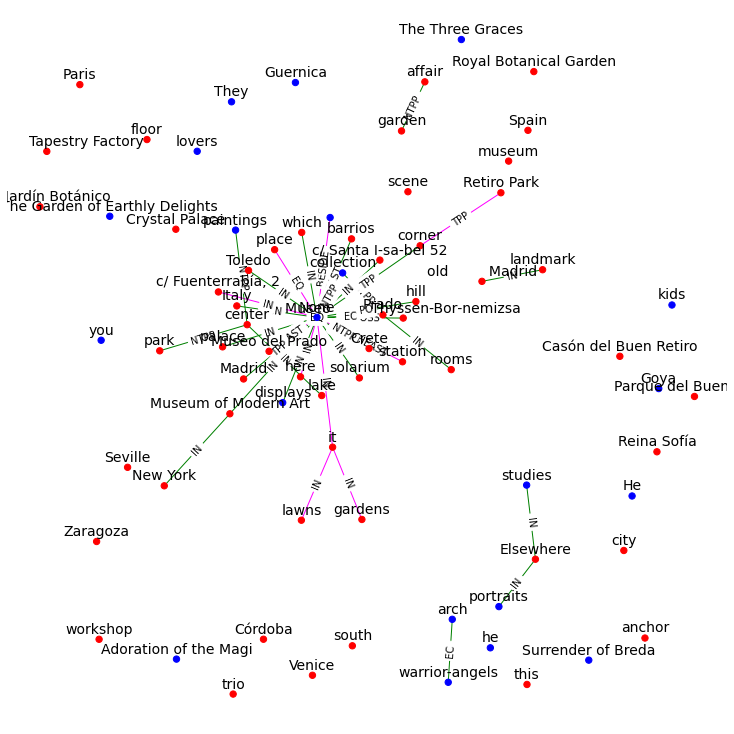

In [345]:
plot_file_as_graph(highlights_of_the_prado_museum)